In [1]:
#  Importar librerías esenciales para EDA
# 1 Cargar el dataset
import pandas as pd       # Datos
import numpy as np        # Calculos numericos
import matplotlib.pyplot as plt  # Graficos
import seaborn as sns     # visualizaciones

#  estilo grafico
sns.set(style="whitegrid")



In [2]:
# revision de las tablas dentro del dataset
# 2 Exploración inicial

import pandas as pd

# url del dataset
url = "https://www.datos.gov.co/resource/9mey-c8s8.csv"

# Leer directamente desde la sitio web
df = pd.read_csv(url)

df.head()



,a_o,trimestre,proveedor,cod_departamento,departamento,cod_municipio,municipio,cabecera_municipal,cod_centro_poblado,centro_poblado,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_4g,cobertura_lte,cobertura_5g
0,2023,3,COLOMBIA MOVIL S.A ESP,27,CHOCÓ,27250,EL LITORAL DEL SAN JUAN,N,27250034,TORDÓ,N,N,N,S,N,N
1,2023,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495,NECHÍ,N,5495003,LA CONCHA,S,S,S,S,N,N
2,2022,3,COLOMBIA MOVIL S.A ESP,70,SUCRE,70508,OVEJAS,N,70508006,DON GABRIEL,N,N,N,S,N,N
3,2021,4,AVANTEL S.A.S,73,TOLIMA,73043,ANZOÁTEGUI,S,73043000,ANZOÁTEGUI,S,S,S,N,N,N
4,2021,2,COMUNICACION CELULAR S A COMCEL S A,50,META,50150,CASTILLA LA NUEVA,N,50150001,SAN LORENZO,S,S,S,S,N,N


In [3]:
# Número de filas y columnas
# 3 Estadísticas descriptivas
print("Filas y columnas:", df.shape)

# Tipos de datos por columna
df.dtypes


Filas y columnas: (1000, 16)


a_o                        int64
trimestre                  int64
proveedor                 object
cod_departamento           int64
departamento              object
cod_municipio              int64
municipio                 object
cabecera_municipal        object
cod_centro_poblado         int64
centro_poblado            object
cobertura_2g              object
cobertura_3g              object
cobertura_hspa_hspa_dc    object
cobertuta_4g              object
cobertura_lte             object
cobertura_5g              object
dtype: object

In [4]:
# Conteo de nulos por columna
# 4 Detección de valores nulos
df.isnull().sum()

# Porcentaje de nulos
(df.isnull().sum() / len(df)) * 100


a_o                       0.0
trimestre                 0.0
proveedor                 0.0
cod_departamento          0.0
departamento              0.0
cod_municipio             0.0
municipio                 0.0
cabecera_municipal        0.0
cod_centro_poblado        0.0
centro_poblado            0.0
cobertura_2g              0.0
cobertura_3g              0.0
cobertura_hspa_hspa_dc    0.0
cobertuta_4g              0.0
cobertura_lte             0.0
cobertura_5g              0.0
dtype: float64

In [5]:
# Lista de columnas de cobertura
# 5 Conversión de columnas de cobertura a numéricas
cols_cobertura = ['cobertura_2g','cobertura_3g','cobertura_hspa_hspa_dc','cobertuta_4g','cobertura_lte','cobertura_5g']

# Convertir a numéricas (si hay valores no válidos los pone como NaN)
for col in cols_cobertura:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar que ya son numéricas
df[cols_cobertura].dtypes



cobertura_2g              float64
cobertura_3g              float64
cobertura_hspa_hspa_dc    float64
cobertuta_4g              float64
cobertura_lte             float64
cobertura_5g              float64
dtype: object

Columnas numéricas detectadas: ['a_o', 'trimestre', 'cod_departamento', 'cod_municipio', 'cod_centro_poblado', 'cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


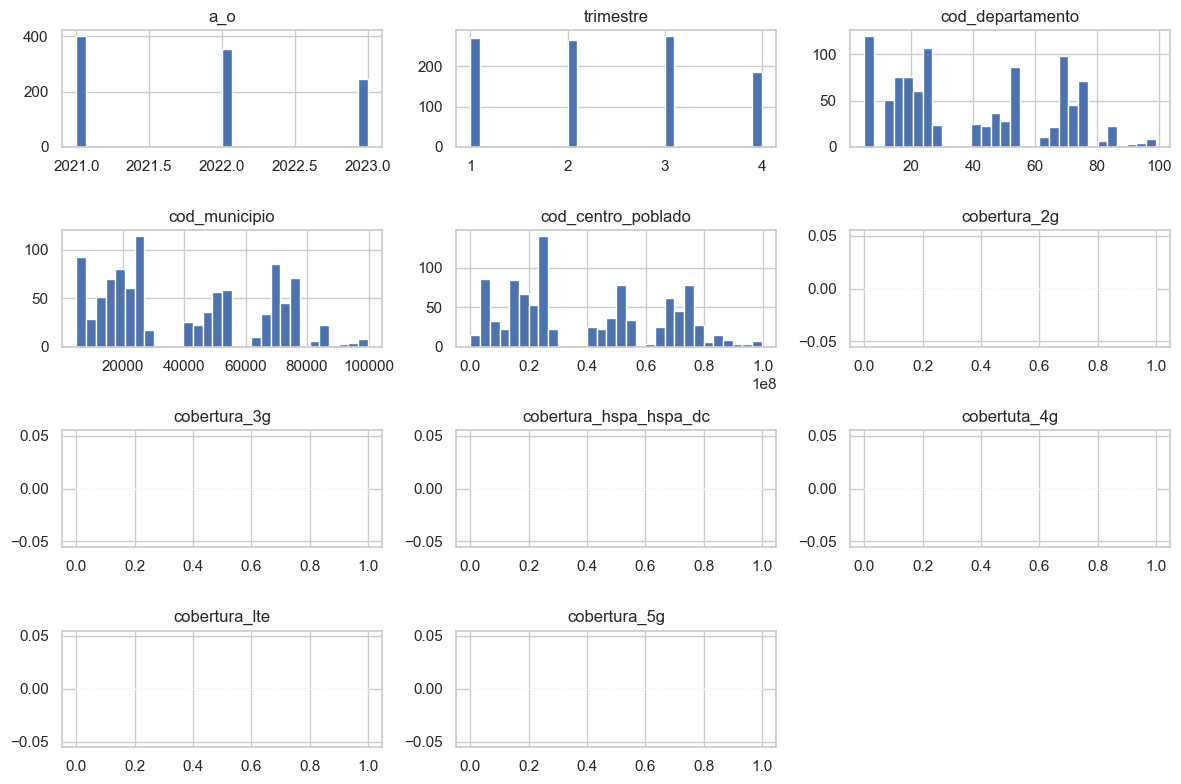

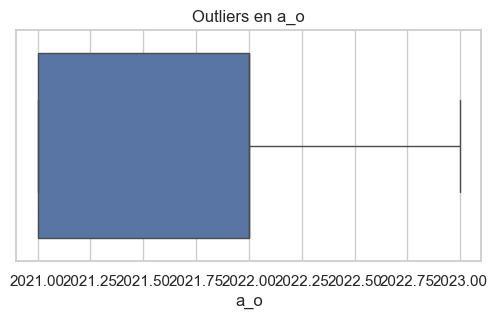

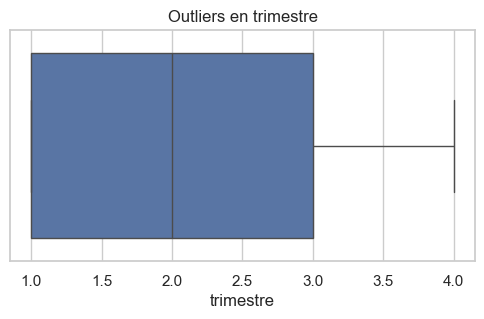

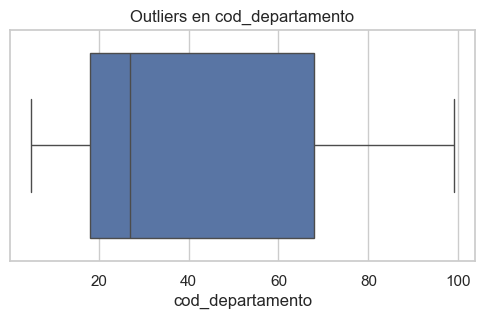

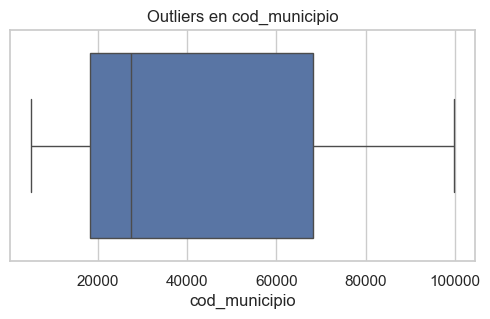

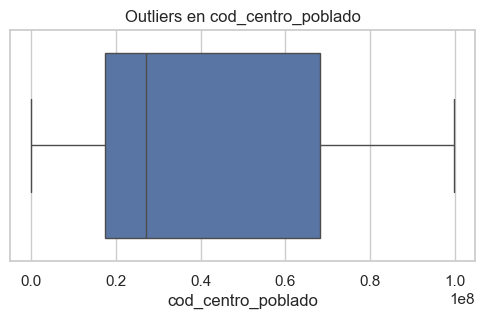

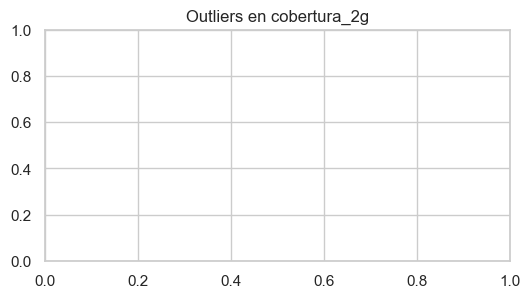

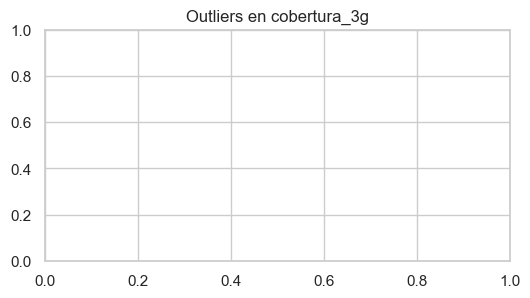

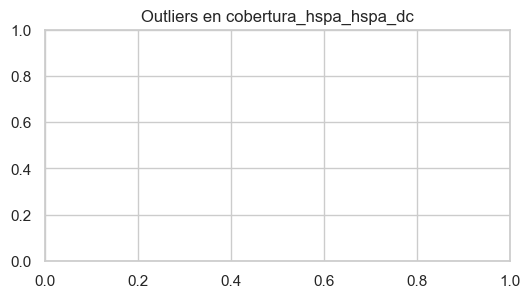

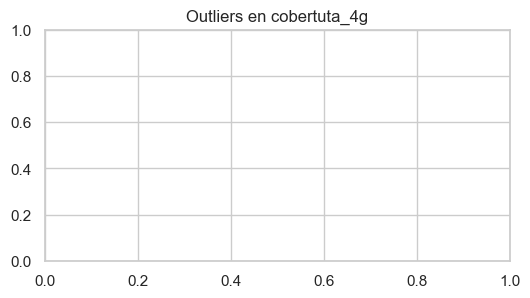

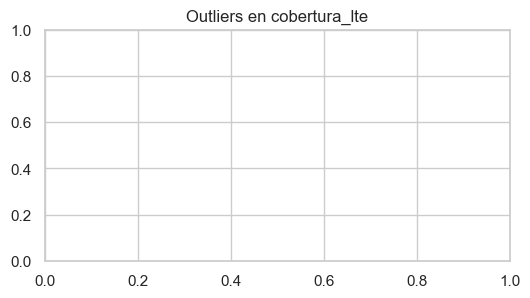

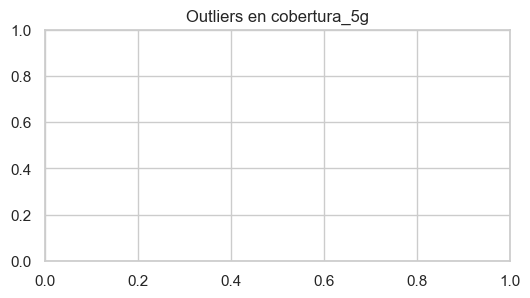

In [6]:
# 6 Visualización de distribuciones y outliers

# Detectar automáticamente columnas numéricas
num_cols = df.select_dtypes(include=['float64','int64']).columns

print("Columnas numéricas detectadas:", num_cols.tolist())

# Histogramas de todas las columnas numéricas
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Outliers en {col}')
    plt.show()



### Hallazgos Día 2
- El dataset tiene filas (x) y columnas (y).
- Columnas con más nulos: La cobertura 5g y algunas coberturas avanzadas tenian mas nulos.
- Las columnas de cobertura ya están convertidas a numéricas.
- Los histogramas muestran que 2G y 3G tienen distribuciones más uniformes.
- LTE y 5G presentan mayor dispersión y valores faltantes.
- Se detectan outliers en algunas tecnologías, especialmente en cobertura LTE.


#Dia 3 EDA avanzado

In [ ]:
# 1 Importar librerias del data set
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar dataset
url = "https://www.datos.gov.co/resource/9mey-c8s8.csv"
df = pd.read_csv(url)

# Nombres de las columnas
df.columns = (df.columns
              .str.lower()
              .str.strip()
              .str.replace(" ", "_", regex=False)
              .str.replace("-", "_", regex=False))

print("Columnas disponibles:", df.columns.tolist())


Columnas disponibles: ['a_o', 'trimestre', 'proveedor', 'cod_departamento', 'departamento', 'cod_municipio', 'municipio', 'cabecera_municipal', 'cod_centro_poblado', 'centro_poblado', 'cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


In [ ]:
# 2 Detectar columnas de cobertura
# Patrones de tecnologia
pats = ["2g","3g","hspa","hspa_dc","4g","lte","5g"]

# columbas cobertura
cols_cobertura = [c for c in df.columns if any(p in c for p in pats)]
print("Columnas de cobertura detectadas:", cols_cobertura)


Columnas de cobertura detectadas: ['cobertura_2g', 'cobertura_3g', 'cobertura_hspa_hspa_dc', 'cobertuta_4g', 'cobertura_lte', 'cobertura_5g']


In [ ]:
# 3 Convertir valores si (S) y no (N) a 1 y 0
for col in cols_cobertura:
    df[col] = df[col].map({'S': 1, 'N': 0}).fillna(0).astype(int)

print("\nValores únicos y varianza después de la conversión:")
for col in cols_cobertura:
    print(f"{col}: Únicos = {df[col].nunique()}, Varianza = {df[col].var():.4f}")



Valores únicos y varianza después de la conversión:
cobertura_2g: Únicos = 2, Varianza = 0.2031
cobertura_3g: Únicos = 2, Varianza = 0.1672
cobertura_hspa_hspa_dc: Únicos = 2, Varianza = 0.2048
cobertuta_4g: Únicos = 2, Varianza = 0.2432
cobertura_lte: Únicos = 2, Varianza = 0.0301
cobertura_5g: Únicos = 1, Varianza = 0.0000


In [ ]:
# Calcular matriz de correlación
corr = df[cols_cobertura].corr(method='pearson')
print(corr)


                        cobertura_2g  cobertura_3g  cobertura_hspa_hspa_dc  \
cobertura_2g                1.000000      0.298752                0.205031   
cobertura_3g                0.298752      1.000000                0.806722   
cobertura_hspa_hspa_dc      0.205031      0.806722                1.000000   
cobertuta_4g                0.005729      0.281985                0.267341   
cobertura_lte               0.073945      0.050424                0.049705   
cobertura_5g                     NaN           NaN                     NaN   

                        cobertuta_4g  cobertura_lte  cobertura_5g  
cobertura_2g                0.005729       0.073945           NaN  
cobertura_3g                0.281985       0.050424           NaN  
cobertura_hspa_hspa_dc      0.267341       0.049705           NaN  
cobertuta_4g                1.000000      -0.211923           NaN  
cobertura_lte              -0.211923       1.000000           NaN  
cobertura_5g                     NaN         

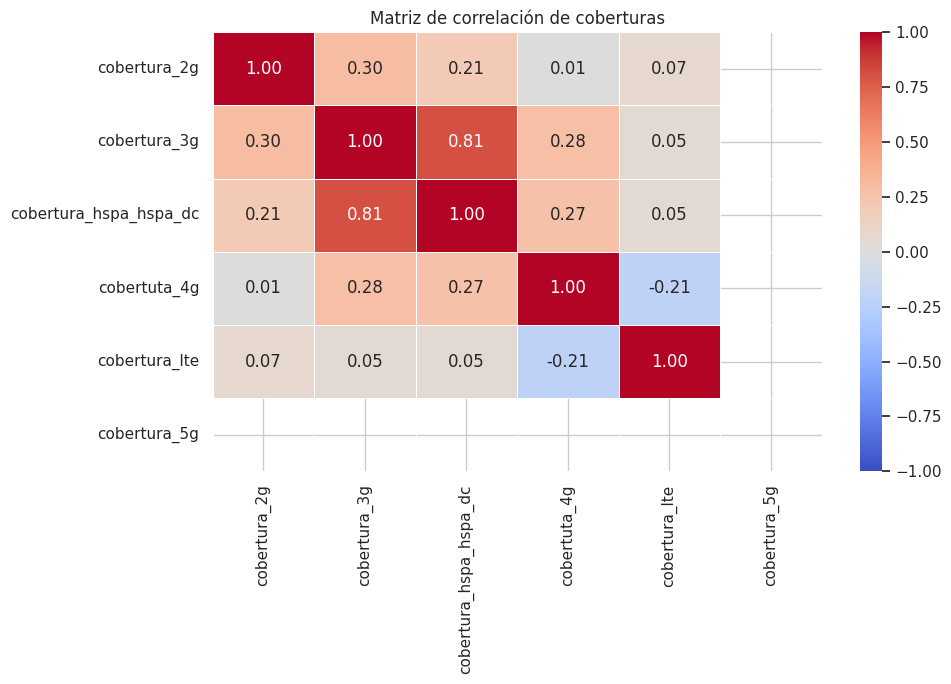

In [ ]:
# 5 Grafico de mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de correlación de coberturas")
plt.tight_layout()
plt.show()


In [ ]:
# 6 Agrupar por departamento y calcular el promedio de coberturas (en porcentaje)
depto_mean = df.groupby("departamento")[cols_cobertura].mean() * 100

print(depto_mean.head())

                                                    cobertura_2g  \
departamento                                                       
AMAZONAS                                               66.666667   
ANTIOQUIA                                              63.636364   
ARAUCA                                                 66.666667   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...      0.000000   
ATLÁNTICO                                              84.375000   

                                                    cobertura_3g  \
departamento                                                       
AMAZONAS                                               33.333333   
ANTIOQUIA                                              77.272727   
ARAUCA                                                 66.666667   
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA...    100.000000   
ATLÁNTICO                                              93.750000   

                                              

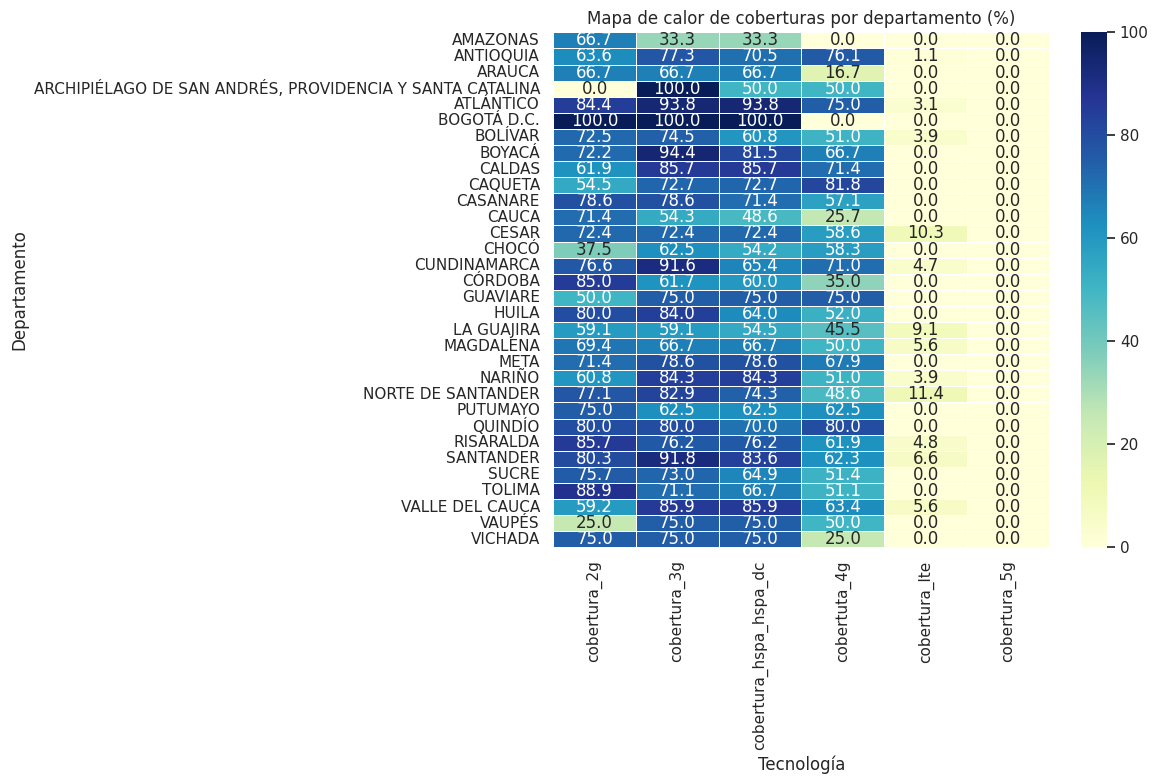

In [ ]:
# 7 Mapa de calor por departamento
plt.figure(figsize=(12,8))
sns.heatmap(depto_mean, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de calor de coberturas por departamento (%)")
plt.ylabel("Departamento")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()


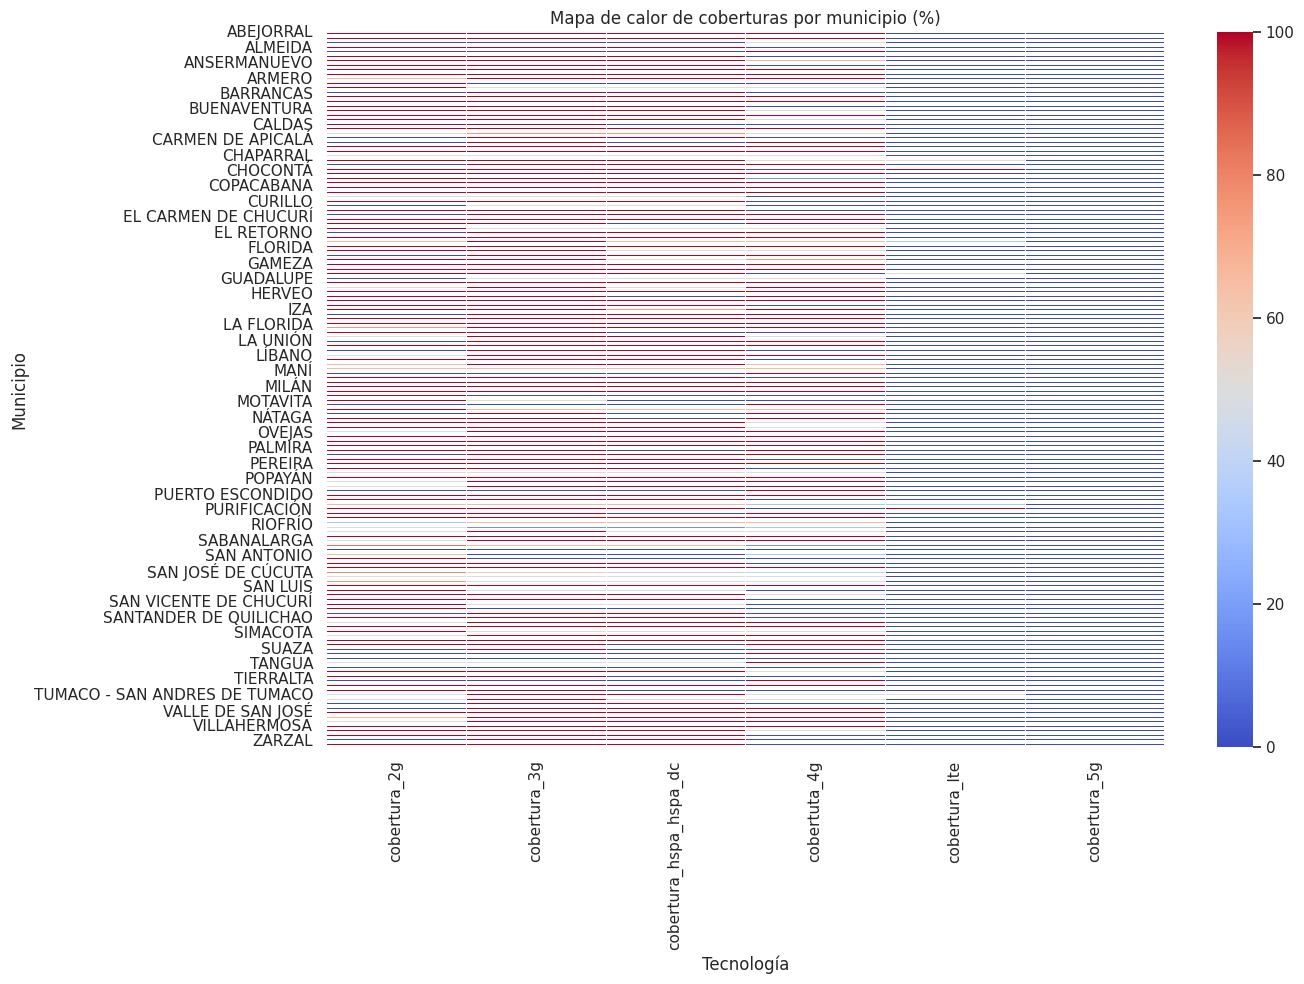

In [60]:
# mapa de calor por municipio
mpio_mean = df.groupby("municipio")[cols_cobertura].mean() * 100

plt.figure(figsize=(14,10))
sns.heatmap(mpio_mean, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de coberturas por municipio (%)")
plt.ylabel("Municipio")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()

### Hallazgos Día 3
- El mapa de calor muestra correlaciones entre tecnologías, con 3G y HSPA más relacionadas y 5G con correlaciones bajas por falta de datos.
- El dataset se agrupó por departamento para calcular el promedio de coberturas, observando que 2G y 3G están más extendidas, mientras que LTE y 5G presentan menor presencia y desigualdad regional.
- El mapa de calor por departamento evidencia brechas claras: algunos departamentos tienen buena cobertura en 4G/LTE, mientras otros apenas cuentan con 2G o 3G.
- El análisis por municipio muestra mayor dispersión, con municipios que tienen cobertura completa en varias tecnologías y otros con valores muy bajos o nulos, especialmente en LTE y 5G.
- Se identifican municipios con valores extremos en LTE, lo que confirma la presencia de outliers también a nivel territorial.
